In [28]:
# import numpy as np
# import pandas as pd

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# import seaborn as sns

# import tensorflow as tf
# from tensorflow import keras

In [29]:
# READ FROM CSV AND CREATE A DATA FRAME

import pandas as pd

df = pd.read_csv('./kidney_disease.csv')
# print(df)
df = df.sample(frac=1).reset_index(drop=True)
print(df.head)

<bound method NDFrame.head of       id   age    bp     sg   al   su       rbc        pc         pcc  \
0    152  39.0  70.0  1.010  0.0  0.0       NaN    normal  notpresent   
1    100  34.0  70.0  1.015  4.0  0.0  abnormal  abnormal  notpresent   
2    292  30.0  80.0  1.020  0.0  0.0    normal    normal  notpresent   
3    256  60.0  80.0  1.025  0.0  0.0    normal    normal  notpresent   
4     55  35.0  80.0  1.005  3.0  0.0  abnormal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...       ...       ...         ...   
395  250  40.0  80.0  1.025  0.0  0.0    normal    normal  notpresent   
396  194  80.0  70.0  1.010  2.0  NaN       NaN  abnormal  notpresent   
397   63  46.0  70.0  1.015  1.0  0.0  abnormal    normal  notpresent   
398   46  48.0  70.0  1.015  0.0  0.0       NaN    normal  notpresent   
399  141  67.0  70.0  1.010  1.0  0.0    normal    normal  notpresent   

             ba  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ... 

In [30]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [31]:
df.drop('id', axis = 1, inplace = True)

# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
print(len(df.columns))
print(df.head())
df.describe()

25
    age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  39.0            70.0             1.010      0.0    0.0             NaN   
1  34.0            70.0             1.015      4.0    0.0        abnormal   
2  30.0            80.0             1.020      0.0    0.0          normal   
3  60.0            80.0             1.025      0.0    0.0          normal   
4  35.0            80.0             1.005      3.0    0.0        abnormal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1  abnormal      notpresent  notpresent                 153.0  ...   
2    normal      notpresent  notpresent                  89.0  ...   
3    normal      notpresent  notpresent                 131.0  ...   
4    normal      notpresent  notpresent                   NaN  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  32                     

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [32]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [33]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

# looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'abnormal' 'normal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['no' 'yes' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



In [34]:
# replace incorrect values

# df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

# df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

# df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'notckd'})

df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [35]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [1 0] values



In [36]:
# cat_cols.append("specific_gravity")
# cat_cols.append("albumin")
# cat_cols.append("sugar")

# num_cols.remove("specific_gravity")
# num_cols.remove("albumin")
# num_cols.remove("sugar")

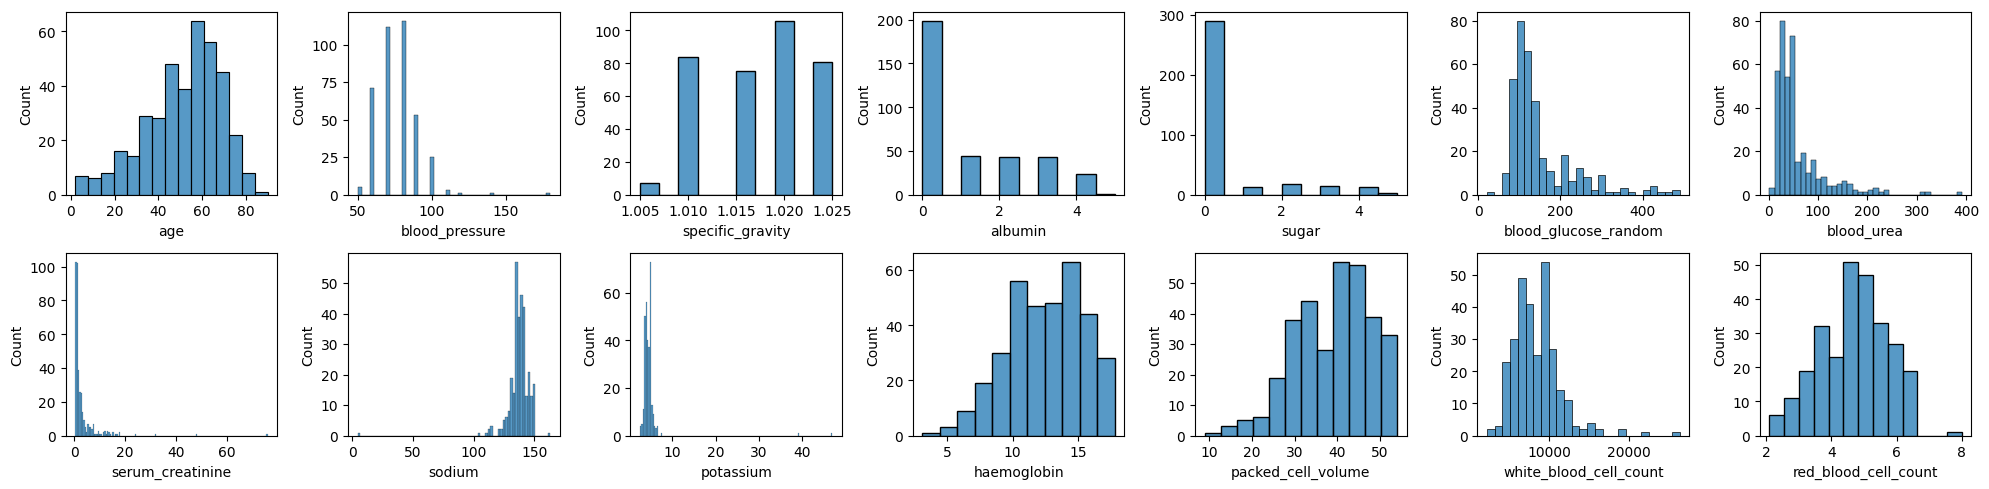

In [37]:
# checking numerical features distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 5))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(2, 7, plotnumber)
        # sns.distplot(df[column])
        sns.histplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

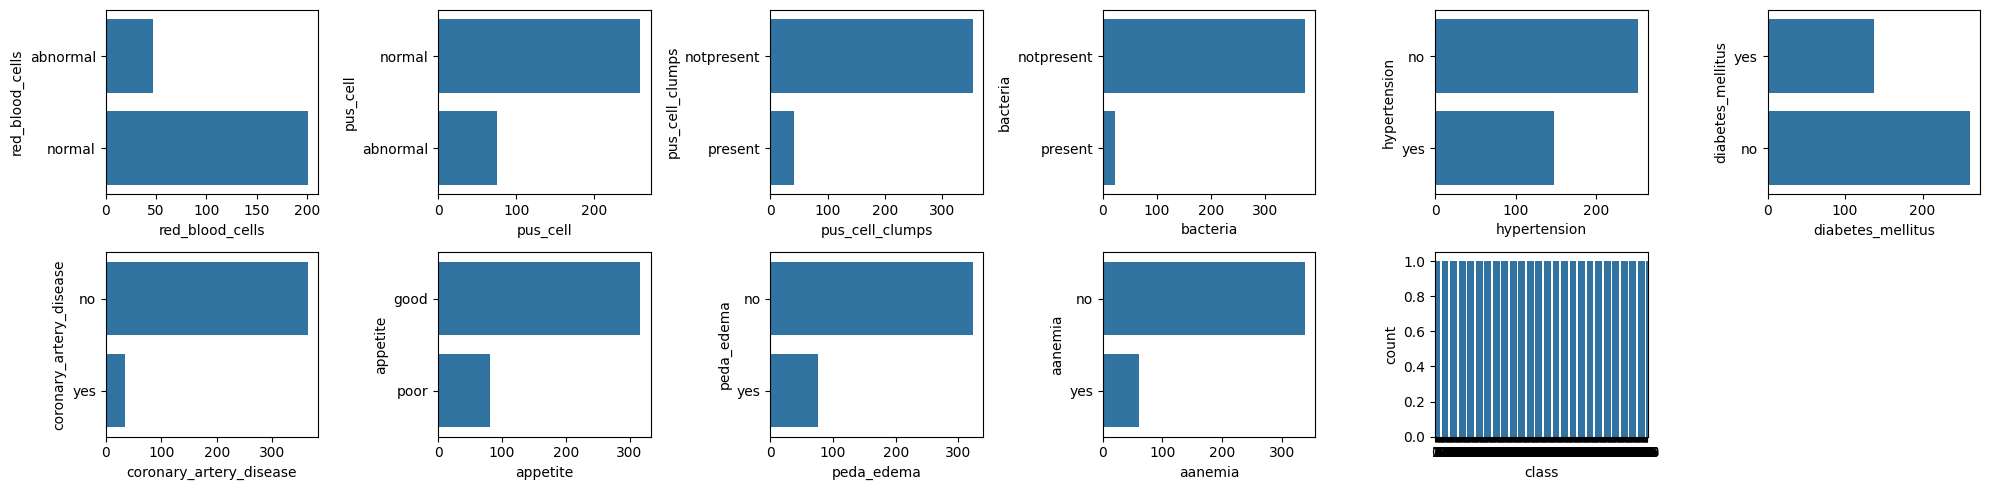

In [38]:
# looking at categorical columns

plt.figure(figsize = (20, 5))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(2, 6, plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

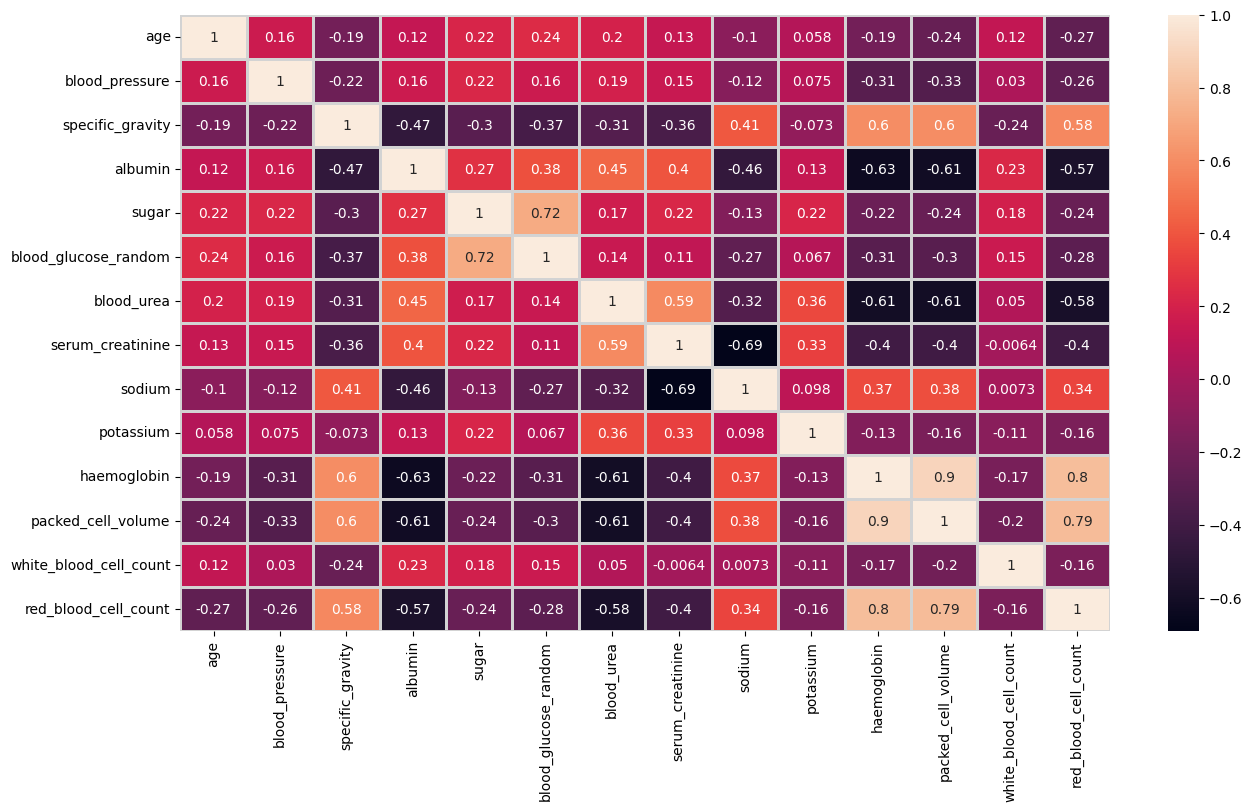

In [39]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols].corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [40]:
# plt.figure(figsize = (15, 8))
# sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
# plt.show()

In [41]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [42]:
print(df["age"].isna().sum())
r = df["age"].dropna().sample(df["age"].isna().sum())
print(r)
r.index = df[df["age"].isnull()].index
print(r.index)
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    # Take N number of random samples from the feature where N = number of NA values
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

9
233    46.0
296    72.0
280    43.0
348     7.0
386    60.0
219    41.0
147    43.0
0      39.0
118    33.0
Name: age, dtype: float64
Index([62, 171, 205, 210, 225, 295, 330, 383, 389], dtype='int64')


In [43]:
for col in num_cols:
    random_value_imputation(col)

In [44]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [45]:
# random_value_imputation('red_blood_cells')
# random_value_imputation('pus_cell')

In [46]:
# df[cat_cols].isna().sum

In [47]:
for col in cat_cols:
    print(col)
    impute_mode(col)

red_blood_cells
pus_cell
pus_cell_clumps
bacteria
hypertension
diabetes_mellitus
coronary_artery_disease
appetite
peda_edema
aanemia
class


In [48]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [50]:
# NEW FIND: TREE BASED MODELS PERFORM BAD AFTER SCALING.
# AFTER SCALING OTHER MODELS SUCH AS SVM, KNN HAD BETTER RESULTS
# AFTER SCALING THE ACCURACY OF DT, RF WORSENED TO 98% FROM 99+%

# # Scaling the numerical columns
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])
# df[num_cols]

In [51]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,39.0,70.0,1.010,0.0,0.0,1,1,0,0,121.0,...,32.0,6500.0,5.5,0,1,0,0,0,0,1
1,34.0,70.0,1.015,4.0,0.0,0,0,0,0,153.0,...,27.0,7300.0,5.5,0,0,0,0,1,0,1
2,30.0,80.0,1.020,0.0,0.0,1,1,0,0,89.0,...,52.0,10200.0,5.0,0,0,0,0,0,0,0
3,60.0,80.0,1.025,0.0,0.0,1,1,0,0,131.0,...,41.0,10700.0,5.1,0,0,0,0,0,0,0
4,35.0,80.0,1.005,3.0,0.0,0,1,0,0,92.0,...,28.0,15700.0,5.6,0,0,0,0,1,0,1


In [52]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

x = df[ind_col]
y = df[dep_col]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [53]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# HYPER PARAMETER TUNING
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {
              'n_neighbors': [1, 3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2],
              'metric': ['cityblock','euclidean']
            } 
  
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


knn_model = grid.best_estimator_
knn_model.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc_test = accuracy_score(y_test, knn_model.predict(x_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn_model.predict(x_train))}")
print(f"Test Accuracy of KNN is {knn_acc_test} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn_model.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn_model.predict(x_test))}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=1, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=1, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=1, weights=uniform;, score=0.750 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=1, weights=uniform;, score=0.732 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=1, weights=distance;, score=0.768 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=1, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=1, weights=distance;, score=0.768 total time=   0.0s
[CV 4/

[CV 5/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=1, weights=distance;, score=0.732 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=2, weights=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=2, weights=uniform;, score=0.768 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=2, weights=uniform;, score=0.750 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=2, weights=uniform;, score=0.732 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=2, weights=distance;, score=0.768 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=2, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=cityblock, n_neighbors=1, p=2, we

In [57]:
from sklearn.svm import SVC # "Support vector classifier"  
from sklearn.metrics import accuracy_score, confusion_matrix
# svm_model = SVC(C=100, gamma=0.0001, kernel='rbf', random_state=42) 
# svm_model.fit(x_train, y_train) 

# HYPER PARAMETER TUNING
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            #   'kernel': ['linear','poly','rbf','sigmoid','precomputed'],
              'kernel': ['linear','rbf','sigmoid']
              } 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

svm_model = grid.best_estimator_
svm_model.fit(x_train, y_train) 

# PREDICT RESULTS
y_pred = svm_model.predict(x_test) 
# train_pred = svm_model.predict(X_train)

print(f"Training Accuracy of SVM is {accuracy_score(y_train, svm_model.predict(x_train))}")
pred = svm_model.score(x_test, y_test)
svm_acc_train = accuracy_score(y_train, svm_model.predict(x_train))
svm_acc_test = accuracy_score(y_test, svm_model.predict(x_test))

print(f"Training Accuracy of SVM is {svm_acc_train}")
print(f"Test Accuracy of SVM is {svm_acc_test} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, svm_model.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, svm_model.predict(x_test))}")

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.946 total time=   6.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.964 total time=   4.4s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.929 total time=   4.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.911 total time=   8.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.946 total time=   5.9s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.607 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.625 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

In [ ]:
# SAVING THE MODEL USING PICKLE PACKAGE
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./ckd-svm.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(svm_model, file)

In [ ]:
# SAVING THE MODEL USING PICKLE PACKAGE
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./ckd-knn.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(knn_model, file)